In [391]:
import graphs.graphs as gg
import simulations.simulations as ss
import networkx as nx
import importlib
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(gg)
importlib.reload(ss)

<module 'simulations.simulations' from '/home/jommysmoth/Masters_2018_2019/cnets/simulations/simulations.py'>

In [392]:
dir_graph = nx.scale_free_graph(2000, seed=100)
graph = [c for c in nx.algorithms.components.strongly_connected_components(dir_graph) if len(c ) > 2][0]
dir_graph = dir_graph.subgraph(sorted(graph))
dir_graph.nodes

NodeView((0, 1, 2, 5, 917, 8, 393, 13, 14, 16, 147, 20, 148, 149, 23, 278, 280, 406, 27, 533, 666, 30, 158, 414, 415, 35, 167, 1065, 298, 43, 172, 45, 427, 47, 430, 49, 689, 182, 56, 578, 1219, 836, 197, 200, 75, 590, 1231, 208, 209, 210, 83, 211, 853, 88, 985, 220, 93, 222, 988, 611, 101, 102, 230, 362, 874, 237, 110, 495, 112, 243, 1139, 633, 122, 379, 124))

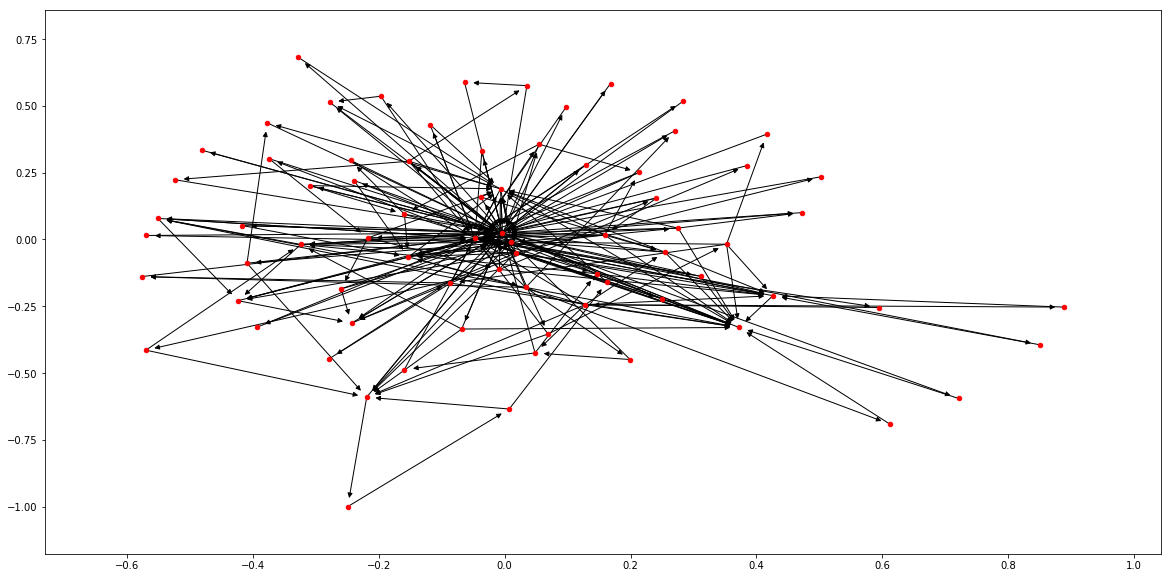

NodeView((0, 1, 2, 5, 917, 8, 393, 13, 14, 16, 147, 20, 148, 149, 23, 278, 280, 406, 27, 533, 666, 30, 158, 414, 415, 35, 167, 1065, 298, 43, 172, 45, 427, 47, 430, 49, 689, 182, 56, 578, 1219, 836, 197, 200, 75, 590, 1231, 208, 209, 210, 83, 211, 853, 88, 985, 220, 93, 222, 988, 611, 101, 102, 230, 362, 874, 237, 110, 495, 112, 243, 1139, 633, 122, 379, 124))

In [393]:
my_dir_graph = gg.clone(dir_graph)
my_dir_graph.draw()
my_dir_graph.nodes

In [394]:
t = ss.WaveEquationSimulation()

In [395]:
t.run(my_dir_graph, n=25000, c=0.1)

Relaxation: : 100%|██████████| 25000/25000 [00:14<00:00, 1705.58it/s]


In [396]:
S = [node for node in t.peaks.keys() if t.peaks[node] == 1]
T = [node for node in t.peaks.keys() if t.peaks[node] == 0]
print(S)
print(T)

[5, 14, 20, 30, 35, 43, 49, 88, 110, 172, 209, 210, 393, 427, 533, 578, 633, 836, 874, 917, 988, 1231]
[0, 1, 2, 8, 13, 16, 23, 27, 45, 47, 56, 75, 83, 93, 101, 102, 112, 122, 124, 147, 148, 149, 158, 167, 182, 197, 200, 208, 211, 220, 222, 230, 237, 243, 278, 280, 298, 362, 379, 406, 414, 415, 430, 495, 590, 611, 666, 689, 853, 985, 1065, 1139, 1219]


In [397]:
nx.algorithms.cuts.conductance(t.graph, S, T)


1.457142857142857

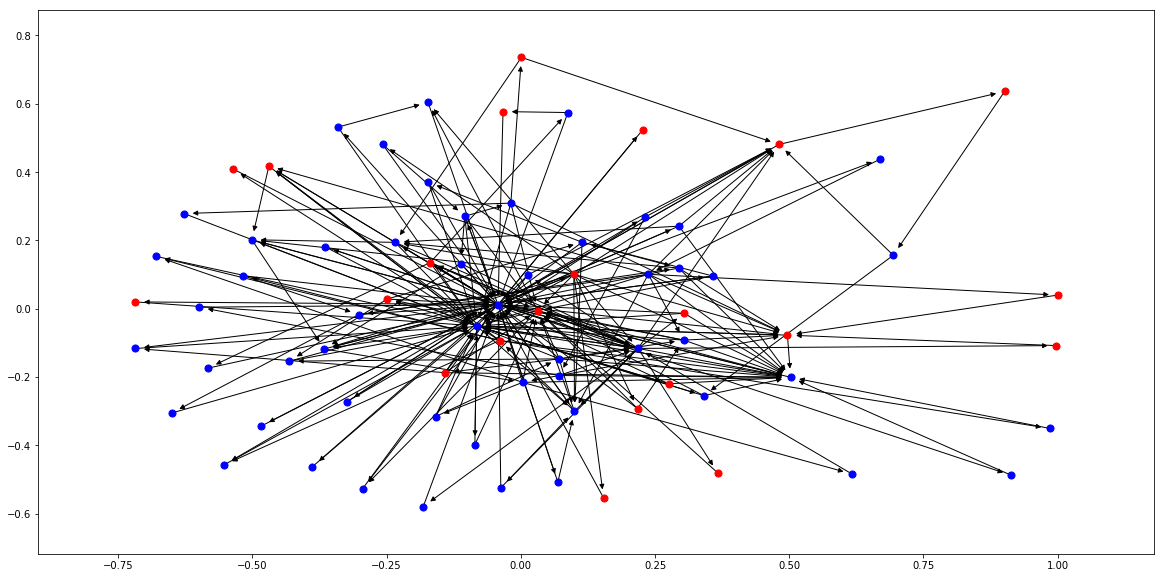

In [398]:
t.highlight_clusters()

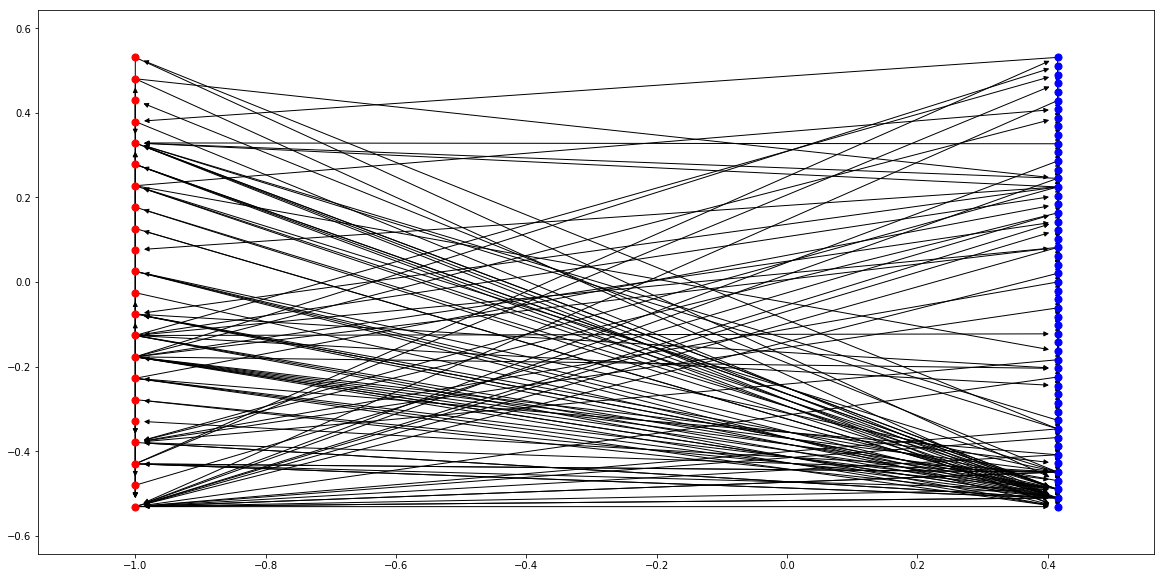

In [399]:
t.draw_partitions()

{1,
 3,
 9,
 12,
 20,
 39,
 42,
 56,
 80,
 93,
 112,
 126,
 161,
 171,
 177,
 179,
 183,
 204,
 255,
 300,
 503,
 775,
 799,
 1054}

{15, 149, 151, 186, 205, 303, 365, 429, 444, 456, 485, 499, 637, 793}

{0,
 47,
 58,
 63,
 154,
 159,
 244,
 262,
 299,
 331,
 355,
 360,
 379,
 397,
 405,
 447,
 480,
 757,
 1092,
 1119}